#### Import Data and Libraries

In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
competitions = sb.competitions()
competitions = competitions.sort_values('season_name' , ascending = False)
competitions.head(2)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-08-12T16:44:27.619465,2023-08-17T15:55:15.164685,2023-08-17T15:55:15.164685,2023-08-12T16:44:27.619465


In [3]:
competitions['competition_name']

65          Women's World Cup
26             FIFA World Cup
64          UEFA Women's Euro
34        Indian Super league
22    FA Women's Super League
               ...           
17           Champions League
18           Champions League
31             FIFA World Cup
32             FIFA World Cup
33             FIFA World Cup
Name: competition_name, Length: 67, dtype: object

In [4]:
fifa_2022 = sb.matches(competition_id=43, season_id=106)
fifa_2022.head(2)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2


In [5]:
print('Number of games in Fifa 2022 men: ' + str(len(fifa_2022)))

Number of games in Fifa 2022 men: 64


In [6]:
#Grouped events
events_fifa = sb.competition_events(
    country="International",
    division='FIFA World Cup',
    season="2022",
    gender="male"
)

In [7]:
events_fifa.head(2)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3412, 'lineup': [{'player': {'id...",Serbia,786,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Switzerland,773,00:00:00.000,Starting XI,NaN


In [8]:
#Get the pass and shot variables
def get_pass_df(events_fifa):
    pass_vars = [col for col in events_fifa.columns if col.startswith('pass_')]
    shot_vars = [col for col in events_fifa.columns if col.startswith('shot_')]
    
    #Create the pass and shot df
    pass_df = events_fifa[pass_vars]
    shot_df = events_fifa[shot_vars]
    return pass_df

In [9]:
get_pass_df(events_fifa)

,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,...,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Pass Events

In [10]:
rows_pass , cols_pass = pass_df.shape
datapoints_pass = rows_pass*cols_pass

NameError: name 'pass_df' is not defined

In [ ]:
#Description for Pass
print('Shape of Pass events table Fifa 2022: ' + str(pass_df.shape))
print('Number of NaNs of pass events table Fifa 2022: ' + str(pass_df.isna().sum().sum()))
print('Percentage of NaNs of pass events table Fifa 2022: ' + str(pass_df.isna().sum().sum()/datapoints_pass))

Shape of Pass events table Fifa 2022: (234652, 23)
Number of NaNs of pass events table Fifa 2022: 4961836
Percentage of NaNs of pass events table Fifa 2022: 0.919369960622539


In [ ]:
# NaN analysis pass
nan_pass = pass_df.isna().sum()
nan_pass_pct = (nan_pass/rows_pass)*100
nan_pass_pct

pass_aerial_won          99.368000
pass_angle               70.801442
pass_assisted_shot_id    99.557217
pass_body_part           72.548710
pass_cross               99.366722
pass_cut_back            99.947156
pass_deflected           99.963776
pass_end_location        70.801442
pass_goal_assist         99.953122
pass_height              70.801442
pass_inswinging          99.900278
pass_length              70.801442
pass_miscommunication    99.984232
pass_no_touch            99.967185
pass_outcome             94.814022
pass_outswinging         99.912210
pass_recipient           72.838501
pass_shot_assist         99.604095
pass_straight            99.991477
pass_switch              99.194126
pass_technique           99.695720
pass_through_ball        99.891755
pass_type                94.846837
dtype: float64

In [ ]:
#Completeness analysis pass
pass_vars_cmplt = 100 - nan_pass_pct
pass_vars_cmplt_df = pass_vars_cmplt.to_frame('Completeness %')
pass_vars_cmplt_df = pass_vars_cmplt_df.sort_values(['Completeness %'] , ascending = False)
pass_vars_cmplt_df

,Completeness %
pass_length,29.198558
pass_end_location,29.198558
pass_angle,29.198558
pass_height,29.198558
pass_body_part,27.451290
pass_recipient,27.161499
pass_outcome,5.185978
pass_type,5.153163
pass_switch,0.805874
pass_cross,0.633278


In [ ]:
pass_vars_cmplt_df = pass_vars_cmplt_df.rename(lambda x: x[5:], axis=0)
pass_vars_cmplt_df

,Completeness %
length,29.198558
end_location,29.198558
angle,29.198558
height,29.198558
body_part,27.451290
recipient,27.161499
outcome,5.185978
type,5.153163
switch,0.805874
cross,0.633278


In [ ]:
def hist_completeness(pass_vars_cmplt_df):
#Histogram of complete Shot attributes
#plt.figure()
#plt.hist(shot_vars_cmplt_df.index, color='blue', alpha=0.7, rwidth=0.2)
    pass_vars_cmplt_df.plot(kind='bar', color='blue', legend=False) #, figsize=(8, 5)
#plt.title(f'Completeness %')
    plt.xlabel('Pass variables')
    plt.ylabel('Completeness %')
#plt.xticks(shot_vars_cmplt_df.rows)
    plt.grid(axis='y')  # Remove vertical grid lines
    plt.xticks(rotation=60, ha='right')
    plt.savefig(f'histogram_pass_vars.png', bbox_inches='tight')
    plt.show()

In [ ]:
def completeness(df):
    rows_pass , cols_pass = df.shape
    datapoints = rows_pass*cols_pass

    #Description for Pass
    print('Shape of Pass events table Fifa 2022: ' + str(df.shape))
    print('Number of NaNs of Pass events table Fifa 2022: ' + str(df.isna().sum().sum()))
    print('Percentage of NaNs of Pass events table Fifa 2022: ' + str(df.isna().sum().sum()/datapoints))

    # NaN analysis Shot
    nan_total = df.isna().sum()
    nan_total_pct = (nan_total/rows_pass)*100
    nan_total_pct

    #Completeness analysis Shot
    vars_cmplt = 100 - nan_total_pct
    vars_cmplt_df = vars_cmplt.to_frame('Completeness %')
    vars_cmplt_df = vars_cmplt_df.sort_values(['Completeness %'] , ascending = False)
    #vars_cmplt_df

    vars_cmplt_df = vars_cmplt_df.rename(lambda x: x[5:], axis=0)
    #vars_cmplt_df

    #Include a threshold for the histogram
    threshold = 4
    vars_cmplt_df_threshold = vars_cmplt_df[vars_cmplt_df > threshold].dropna()
    
    #Histogram of complete Shot attributes
    #plt.figure()
    #plt.hist(shot_vars_cmplt_df.index, color='blue', alpha=0.7, rwidth=0.2)
    vars_cmplt_df_threshold.plot(kind='bar', color='blue', legend=False) #, figsize=(8, 5)
    #plt.title(f'Completeness %')
    plt.xlabel('Pass variables - Final')
    plt.ylabel('Completeness %')
    #plt.xticks(shot_vars_cmplt_df.rows)
    plt.grid(axis='y')  # Remove vertical grid lines
    plt.xticks(rotation=60, ha='right')
    #plt.savefig(f'histogram_pass_final.png', bbox_inches='tight')
    plt.show()

c:\Users\capta\Desktop\Python\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Shape of Pass events table Fifa 2022: (4407, 19)
Number of NaNs of Pass events table Fifa 2022: 75663
Percentage of NaNs of Pass events table Fifa 2022: 0.9036222277954928


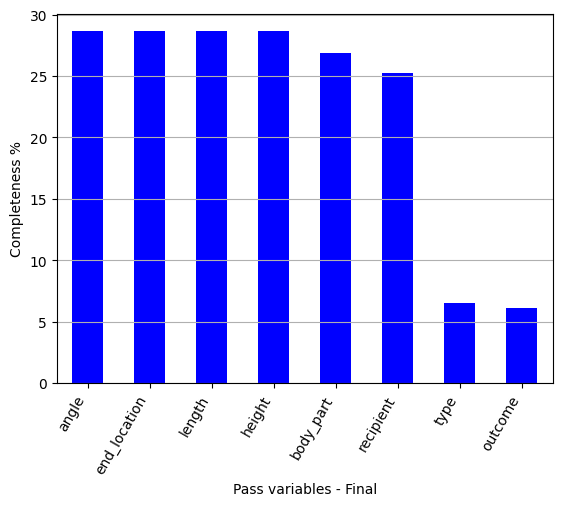

In [ ]:
completeness(get_pass_df(get_events_df(df_finals)))

#### Description of the data

In [ ]:
#Description for Pass
print('Shape of Pass events table Fifa 2022: ' + str(events_fifa_pass.shape))
print('Number of NaNs of Pass events table Fifa 2022: ' + str(events_fifa_pass.isna().sum().sum()))
print('Percentage of NaNs of Pass events table Pass Fifa 2022: ' + str(events_fifa_pass.isna().sum().sum()/datapoints_pass))

Shape of Pass events table Fifa 2022: (233961, 23)
Number of NaNs of Pass events table Fifa 2022: 4946043
Percentage of NaNs of Pass events table Pass Fifa 2022: 0.9191504046661065


Description of different Stages

In [ ]:
stages_2022 = fifa_2022['competition_stage'].unique()
stages_2022

array(['Group Stage', 'Round of 16', 'Quarter-finals', 'Final',
       '3rd Place Final', 'Semi-finals'], dtype=object)

In [ ]:
dfs = {}
for stage in stages_2022:
    sub_df = fifa_2022[fifa_2022['competition_stage'] == stage]
    dfs[stage] = sub_df

In [ ]:
dfs_stages = {}

df_16 = fifa_2022[fifa_2022['competition_stage'] == 'Round of 16']
df_groups = fifa_2022[fifa_2022['competition_stage'] == 'Group Stage']
df_8 = fifa_2022[fifa_2022['competition_stage'] == 'Quarter-finals']
df_4 = fifa_2022[fifa_2022['competition_stage'] == 'Semi-finals']
df_finals = fifa_2022[fifa_2022['competition_stage'] == 'Final']
df_3place = fifa_2022[fifa_2022['competition_stage'] == '3rd Place Final']

dfs_stages = [df_16 , df_8, df_4, df_3place, df_groups, df_finals]

In [ ]:
def get_events_df(df):
    list_match = df['match_id'].unique()
    df_new = pd.DataFrame()
    for i in range(len(list_match)):
        df_new = pd.concat([df_new,sb.events(match_id=list_match[i])] , ignore_index=True)
    
    return df_new


c:\Users\capta\Desktop\Python\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\capta\Desktop\Python\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Shape of Shot events table Fifa 2022: (7357, 22)
Number of NaNs of Shot events table Fifa 2022: 148734
Percentage of NaNs of Shot events table Fifa 2022: 0.9189392909659323


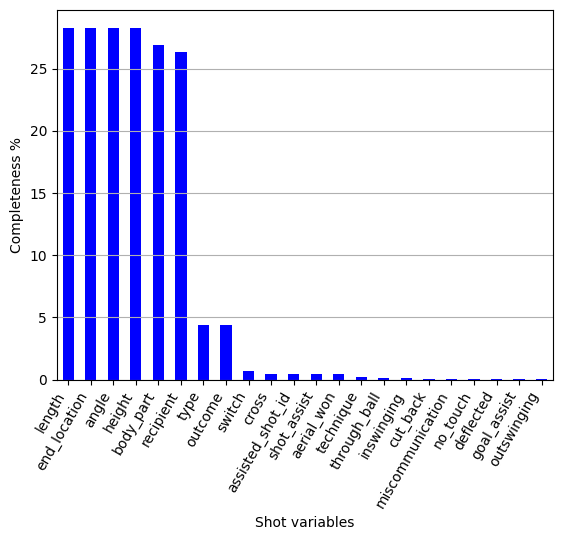

In [ ]:
completeness(get_pass_df(get_events_df(df_4)))

In [ ]:
df_finals

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version


c:\Users\capta\Desktop\Python\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Shape of Shot events table Fifa 2022: (4407, 19)
Number of NaNs of Shot events table Fifa 2022: 75663
Percentage of NaNs of Shot events table Fifa 2022: 0.9036222277954928


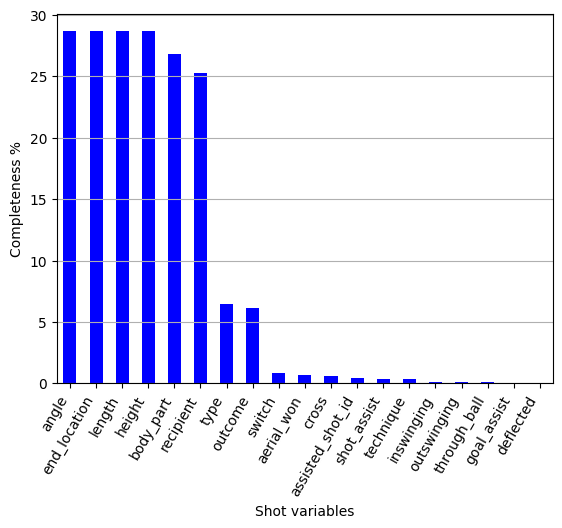

In [ ]:
completeness(get_pass_df(get_events_df(df_finals)))